In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_superstore = pd.read_excel('superstore.xls')
df_superstore.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87


In [3]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
#Membuat kolom baru tahun menggunakan existing columns Order Date
#menggunakan teknik apply lambda
df_superstore['year'] = df_superstore['Order Date'].apply(lambda x: str(x)[:4])

In [5]:
df_superstore.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,2016


In [6]:
#show columns
df_superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'year'],
      dtype='object')

In [7]:
"""
Standarize nama column 
1. lower case (ubah jadi kecil semua)
2. snake case (gunakan underscore untuk memisahkan antar kata)
3. tidak mengandung karakter (ex. -,?/)
"""

list_columns_name = df_superstore.columns
list_new_columns_name = []

for i in list_columns_name:
    new_column = i.lower() #lower case
    new_column = new_column.replace('-', ' ')
    get_list_all_word = new_column.split()
    if len(get_list_all_word) >= 2: #more than 1 words
        for i, v in enumerate(get_list_all_word):
            if i == 0: #first word
                new_fit_columns = v
            else:
                new_fit_columns = new_fit_columns + '_' + v
    else:
        new_fit_columns = get_list_all_word[0] #get proper column name 1 word 
#     print(new_fit_columns)
    list_new_columns_name.append(new_fit_columns)
print(list_new_columns_name)

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'year']


In [8]:
df_superstore.columns = list_new_columns_name
df_superstore.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,2015


In [9]:
def create_barplot(data, x, y):
    #agregat dataframe
    df_group = df_superstore.groupby([x])[y].sum().reset_index()
    
    #sort values
    df_group = df_group.sort_values(by=x)
    
    x = df_group.columns[0]
    y = df_group.columns[1]
    
    #seaborn viz
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=x, y=y, data=df_group,
                     errwidth=0)
    
    title = 'Total ' + y + ' per ' + x
    plt.title(title, fontsize=14)
    plt.xlabel(x, size=16)
    plt.ylabel(y, size=16)
    
    # label.
    for i in ax.containers:
        ax.bar_label(i,fmt='%i') #only for matplotlib version 3.4 >=
    
    plt.show()
    print('Completed!')

In [10]:
def create_barplot_multi(data, x, y, z):
    #agregat dataframe
    df_group = df_superstore.groupby([x, z])[y].sum().reset_index()
    
    #sort values
    df_group = df_group.sort_values(by=y, ascending=False)
    
    x = df_group.columns[0]
    z = df_group.columns[1]
    y = df_group.columns[2]
    
    #seaborn viz
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=x, y=y,hue=z, data=df_group,
                     errwidth=0)
    
    title = 'Total ' + y + ' per ' + x + ' per ' + z
    plt.title(title, fontsize=14)
    plt.xlabel(x, size=16)
    plt.ylabel(y, size=16)
    
    # label.
    for i in ax.containers:
        ax.bar_label(i,fmt='%i') #only for matplotlib version 3.4 >=
    
    plt.show()
    print('Completed!')

### Plot Profit per Segment

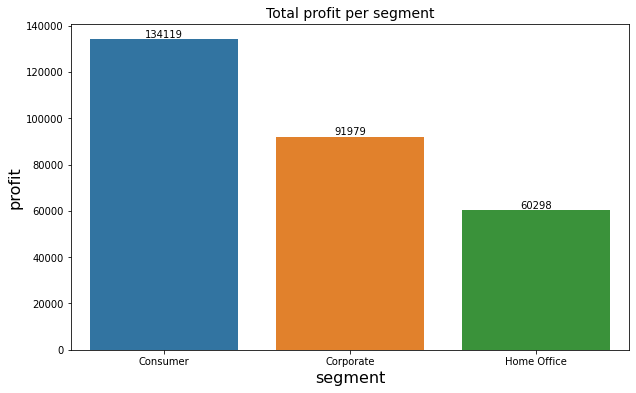

Completed!


In [11]:
create_barplot(df_superstore, x='segment', y='profit')

### Plot Profit per Category

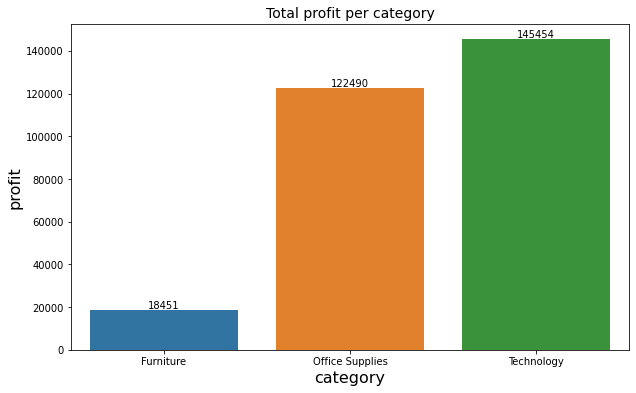

Completed!


In [12]:
create_barplot(df_superstore, x='category', y='profit')

### Plot Sales per Region

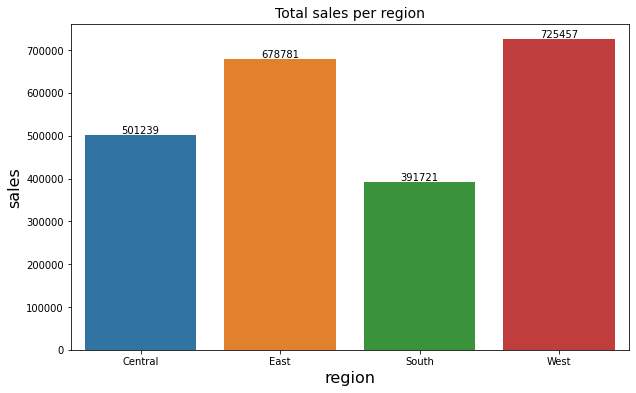

Completed!


In [13]:
create_barplot(df_superstore, x='region', y='sales')

### Plot Sales per year per Segment

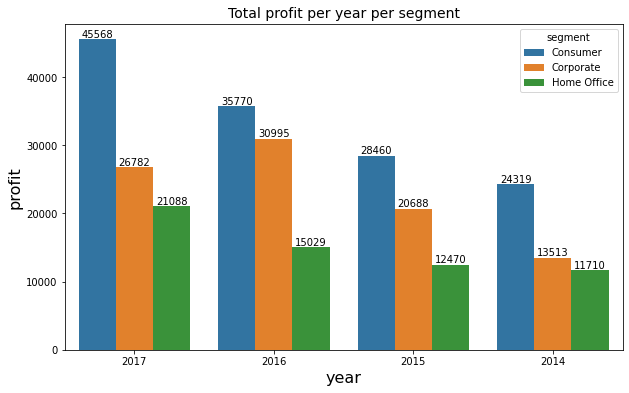

Completed!


In [14]:
create_barplot_multi(df_superstore, x='year', y='profit', z='segment')